In [1]:
import pandas as pd

data = pd.read_csv('csv/real_data.csv')
data.drop(columns=['회사명','회계년도'], inplace=True)
data.columns=['종목코드','배당성향','연결자본','연도','시가총액','종목명','기업구분','PBR']

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\2013345346.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pbr_drop = data[data['PBR'] < 0.2].index
data.drop(pbr_drop, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,종목코드,배당성향,연결자본,연도,시가총액,종목명,기업구분,PBR
0,990,0.0,835716158.0,2007,3.585737e+11,DB하이텍,B,0.429062
1,990,0.0,607545037.0,2009,2.668661e+11,DB하이텍,S,0.439253
2,990,0.0,398016157.0,2010,4.570225e+11,DB하이텍,B,1.148251
3,990,0.0,308061688.0,2011,3.101546e+11,DB하이텍,S,1.006794
4,990,0.0,290893335.0,2012,3.101546e+11,DB하이텍,S,1.066214
...,...,...,...,...,...,...,...,...
6882,3280,0.0,73148175.0,2018,7.060866e+10,흥아해운,S,0.965283
6883,3280,0.0,30919383.0,2019,5.392606e+10,흥아해운,S,1.744086
6884,3280,0.0,102939788.0,2021,6.491472e+11,흥아해운,S,6.306087
6885,3280,0.0,135304736.0,2022,3.257757e+11,흥아해운,S,2.407719


In [3]:
data['배당성향'] = data['배당성향'].fillna(0)
data

,종목코드,배당성향,연결자본,연도,시가총액,종목명,기업구분,PBR
0,990,0.0,835716158.0,2007,3.585737e+11,DB하이텍,B,0.429062
1,990,0.0,607545037.0,2009,2.668661e+11,DB하이텍,S,0.439253
2,990,0.0,398016157.0,2010,4.570225e+11,DB하이텍,B,1.148251
3,990,0.0,308061688.0,2011,3.101546e+11,DB하이텍,S,1.006794
4,990,0.0,290893335.0,2012,3.101546e+11,DB하이텍,S,1.066214
...,...,...,...,...,...,...,...,...
6882,3280,0.0,73148175.0,2018,7.060866e+10,흥아해운,S,0.965283
6883,3280,0.0,30919383.0,2019,5.392606e+10,흥아해운,S,1.744086
6884,3280,0.0,102939788.0,2021,6.491472e+11,흥아해운,S,6.306087
6885,3280,0.0,135304736.0,2022,3.257757e+11,흥아해운,S,2.407719


In [4]:
data['1/PBR'] = data['PBR'].apply(lambda x : 'H' if x < 1 else 'L')
data


,종목코드,배당성향,연결자본,연도,시가총액,종목명,기업구분,PBR,1/PBR
0,990,0.0,835716158.0,2007,3.585737e+11,DB하이텍,B,0.429062,H
1,990,0.0,607545037.0,2009,2.668661e+11,DB하이텍,S,0.439253,H
2,990,0.0,398016157.0,2010,4.570225e+11,DB하이텍,B,1.148251,L
3,990,0.0,308061688.0,2011,3.101546e+11,DB하이텍,S,1.006794,L
4,990,0.0,290893335.0,2012,3.101546e+11,DB하이텍,S,1.066214,L
...,...,...,...,...,...,...,...,...,...
6882,3280,0.0,73148175.0,2018,7.060866e+10,흥아해운,S,0.965283,H
6883,3280,0.0,30919383.0,2019,5.392606e+10,흥아해운,S,1.744086,L
6884,3280,0.0,102939788.0,2021,6.491472e+11,흥아해운,S,6.306087,L
6885,3280,0.0,135304736.0,2022,3.257757e+11,흥아해운,S,2.407719,L


In [5]:
firm_data = data.drop(columns=['연결자본','시가총액'])
firm_data

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
0,990,0.0,2007,DB하이텍,B,0.429062,H
1,990,0.0,2009,DB하이텍,S,0.439253,H
2,990,0.0,2010,DB하이텍,B,1.148251,L
3,990,0.0,2011,DB하이텍,S,1.006794,L
4,990,0.0,2012,DB하이텍,S,1.066214,L
...,...,...,...,...,...,...,...
6882,3280,0.0,2018,흥아해운,S,0.965283,H
6883,3280,0.0,2019,흥아해운,S,1.744086,L
6884,3280,0.0,2021,흥아해운,S,6.306087,L
6885,3280,0.0,2022,흥아해운,S,2.407719,L


In [6]:
firm_data = firm_data.drop(firm_data[firm_data['배당성향'] < 0].index)
firm_data[firm_data['배당성향'] < 0]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR


In [7]:
firm_data.reset_index(drop=True, inplace=True)
firm_data.sort_values(by='배당성향', ascending=False)

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
445,4370,11174.40,2012,농심,B,0.969078,H
2054,220,6172.77,2020,유유제약,S,0.997046,H
5184,6880,5067.25,2015,신송홀딩스,S,0.676405,H
298,1570,3935.22,2007,금양,S,0.973313,H
4979,7610,2752.04,2018,선도전기,S,0.947968,H
...,...,...,...,...,...,...,...
3159,93370,0.00,2016,후성,B,4.151182,L
3160,93370,0.00,2017,후성,B,4.489259,L
3161,93370,0.00,2018,후성,B,2.798946,L
3163,93370,0.00,2020,후성,B,4.530805,L


In [8]:
firm_data['배당'] = firm_data['배당성향'].apply(lambda x : 'DL' if x <= 26 else 'DH')
firm_data

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,990,0.0,2007,DB하이텍,B,0.429062,H,DL
1,990,0.0,2009,DB하이텍,S,0.439253,H,DL
2,990,0.0,2010,DB하이텍,B,1.148251,L,DL
3,990,0.0,2011,DB하이텍,S,1.006794,L,DL
4,990,0.0,2012,DB하이텍,S,1.066214,L,DL
...,...,...,...,...,...,...,...,...
6878,3280,0.0,2018,흥아해운,S,0.965283,H,DL
6879,3280,0.0,2019,흥아해운,S,1.744086,L,DL
6880,3280,0.0,2021,흥아해운,S,6.306087,L,DL
6881,3280,0.0,2022,흥아해운,S,2.407719,L,DL


In [9]:
firm_data[firm_data['연도'] == 2023]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
15,990,0.0,2023,DB하이텍,B,1.495192,L,DL
47,23150,0.0,2023,MH에탄올,S,0.508684,H,DL
64,2360,0.0,2023,SH에너지화학,S,0.790362,H,DL
81,9160,0.0,2023,SIMPAC,S,0.441379,H,DL
115,2710,0.0,2023,TCC스틸,B,6.557681,L,DL
...,...,...,...,...,...,...,...,...
6817,2460,0.0,2023,화성산업,S,0.298092,H,DL
6834,10660,0.0,2023,화천기계,S,0.618922,H,DL
6850,850,0.0,2023,화천기공,S,0.201507,H,DL
6867,16580,0.0,2023,환인제약,S,0.780958,H,DL


In [10]:
HDH = firm_data.loc[(firm_data['1/PBR'] == 'H') & (firm_data['배당'] == 'DH')].sort_values('연도')
HDL = firm_data.loc[(firm_data['1/PBR'] == 'H') & (firm_data['배당'] == 'DL')].sort_values('연도')
LDH = firm_data.loc[(firm_data['1/PBR'] == 'L') & (firm_data['배당'] == 'DH')].sort_values('연도')
LDL = firm_data.loc[(firm_data['1/PBR'] == 'L') & (firm_data['배당'] == 'DL')].sort_values('연도')

In [11]:
HDL


,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,990,0.0,2007,DB하이텍,B,0.429062,H,DL
3051,3010,22.4,2007,혜인,S,0.650634,H,DL
6646,9830,19.0,2007,한화솔루션,B,0.852466,H,DL
1344,58650,8.4,2007,세아홀딩스,B,0.312859,H,DL
1349,13000,0.0,2007,세우글로벌,S,0.702343,H,DL
...,...,...,...,...,...,...,...,...
4360,17180,0.0,2023,명문제약,S,0.874137,H,DL
1801,15360,0.0,2023,예스코홀딩스,S,0.393631,H,DL
6490,69640,0.0,2023,한세엠케이,S,0.737404,H,DL
439,5250,0.0,2023,녹십자홀딩스,B,0.408660,H,DL


In [12]:
BDH = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['배당'] == 'DH')].sort_values('연도')
BDL = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['배당'] == 'DL')].sort_values('연도')
SDH = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['배당'] == 'DH')].sort_values('연도')
SDL = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['배당'] == 'DL')].sort_values('연도')

BDH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
16,97230,74.97,2007,HJ중공업,B,3.482819,L,DH
4663,28050,30.00,2007,삼성엔지니어링,B,7.291219,L,DH
4679,9150,34.16,2007,삼성전기,B,1.830308,L,DH
3004,10620,27.37,2007,현대미포조선,B,1.850676,L,DH
2917,2320,78.06,2007,한진,B,0.924602,H,DH
...,...,...,...,...,...,...,...,...
2258,30000,185.10,2022,제일기획,B,2.170981,L,DH
3630,270,71.83,2022,기아,B,0.610985,H,DH
2340,13890,402.19,2022,지누스,B,1.056482,L,DH
3762,1680,34.02,2022,대상,B,0.573701,H,DH


In [13]:
BH = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['1/PBR'] == 'H')].sort_values('연도')
BL = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['1/PBR'] == 'L')].sort_values('연도')
SH = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['1/PBR'] == 'H')].sort_values('연도')
SL = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['1/PBR'] == 'L')].sort_values('연도')

BH.loc[firm_data['연도'] == 2007]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,990,0.00,2007,DB하이텍,B,0.429062,H,DL
844,1520,0.00,2007,동양,B,0.465190,H,DL
1199,70,35.40,2007,삼양홀딩스,B,0.689291,H,DH
1344,58650,8.40,2007,세아홀딩스,B,0.312859,H,DL
1754,670,2.10,2007,영풍,B,0.881007,H,DL
1909,16880,159.50,2007,웅진,B,0.750818,H,DH
2449,2020,0.00,2007,코오롱,B,0.833169,H,DL
2664,5810,0.00,2007,풍산홀딩스,B,0.703365,H,DL
2849,20000,12.62,2007,한섬,B,0.891699,H,DL
474,23590,3.90,2007,다우기술,B,0.851535,H,DL


In [14]:
BH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,990,0.0,2007,DB하이텍,B,0.429062,H,DL
844,1520,0.0,2007,동양,B,0.465190,H,DL
1199,70,35.4,2007,삼양홀딩스,B,0.689291,H,DH
1344,58650,8.4,2007,세아홀딩스,B,0.312859,H,DL
1754,670,2.1,2007,영풍,B,0.881007,H,DL
...,...,...,...,...,...,...,...,...
4315,4000,0.0,2023,롯데정밀화학,B,0.627894,H,DL
3928,6650,0.0,2023,대한유화,B,0.544994,H,DL
3180,81660,0.0,2023,휠라홀딩스,B,0.920590,H,DL
3149,4800,0.0,2023,효성,B,0.480434,H,DL


In [15]:
BH = BH.sort_values('연도')
BH.reset_index(drop=True, inplace=True)
BL.reset_index(drop=True, inplace=True)
SH.reset_index(drop=True, inplace=True)
SL.reset_index(drop=True, inplace=True)

BDH.reset_index(drop=True, inplace=True)
BDL.reset_index(drop=True, inplace=True)
SDH.reset_index(drop=True, inplace=True)
SDL.reset_index(drop=True, inplace=True)

BDH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,97230,74.97,2007,HJ중공업,B,3.482819,L,DH
1,28050,30.00,2007,삼성엔지니어링,B,7.291219,L,DH
2,9150,34.16,2007,삼성전기,B,1.830308,L,DH
3,10620,27.37,2007,현대미포조선,B,1.850676,L,DH
4,2320,78.06,2007,한진,B,0.924602,H,DH
...,...,...,...,...,...,...,...,...
520,30000,185.10,2022,제일기획,B,2.170981,L,DH
521,270,71.83,2022,기아,B,0.610985,H,DH
522,13890,402.19,2022,지누스,B,1.056482,L,DH
523,1680,34.02,2022,대상,B,0.573701,H,DH


In [16]:
BH[BH['종목코드'] == 3090]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
241,3090,43.02,2013,대웅,B,0.676986,H,DH
279,3090,37.48,2014,대웅,B,0.740791,H,DH
339,3090,48.23,2015,대웅,B,0.794428,H,DH
479,3090,68.33,2019,대웅,B,0.733682,H,DH
604,3090,7.71,2022,대웅,B,0.924731,H,DL
680,3090,0.00,2023,대웅,B,0.835630,H,DL


In [17]:
end = pd.read_csv('csv/month_rtn_data.csv', index_col=0)
end

,종목코드,종목명,sell_rtn,연도,Date
0,5930,삼성전자,0.053459,2001,2001-01-31
1,5930,삼성전자,0.274627,2001,2001-02-28
2,5930,삼성전자,-0.154567,2001,2001-03-31
3,5930,삼성전자,0.105263,2001,2001-04-30
4,5930,삼성전자,0.147870,2001,2001-05-31
...,...,...,...,...,...
113547,30790,비케이탑스,0.000000,2023,2023-11-30
113548,30790,비케이탑스,0.000000,2023,2023-12-31
113549,30790,비케이탑스,0.000000,2024,2024-01-31
113550,30790,비케이탑스,0.000000,2024,2024-02-29


In [18]:
BH = pd.merge(BH, end, on=['종목코드','종목명', '연도'])
BL = pd.merge(BL, end, on=['종목코드','종목명', '연도'])
SH = pd.merge(SH, end, on=['종목코드','종목명', '연도'])
SL = pd.merge(SL, end, on=['종목코드','종목명', '연도'])

In [19]:
BDH = pd.merge(BDH, end, on=['종목코드','종목명','연도'])
BDL = pd.merge(BDL, end, on=['종목코드','종목명','연도'])
SDH = pd.merge(SDH, end, on=['종목코드','종목명','연도'])
SDL = pd.merge(SDL, end, on=['종목코드','종목명','연도'])

BDH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당,sell_rtn,Date
0,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,NaN,2007-08-31
1,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,0.093174,2007-09-30
2,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,-0.085232,2007-10-31
3,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,0.216162,2007-11-30
4,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,-0.236981,2007-12-31
...,...,...,...,...,...,...,...,...,...,...
6262,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,0.012821,2022-08-31
6263,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,-0.077758,2022-09-30
6264,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,-0.084314,2022-10-31
6265,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,-0.007495,2022-11-30


In [20]:
HDH = pd.merge(HDH, end, on=['종목코드','종목명','연도'])
HDL = pd.merge(HDL, end, on=['종목코드','종목명','연도'])
LDH = pd.merge(LDH, end, on=['종목코드','종목명','연도'])
LDL = pd.merge(LDL, end, on=['종목코드','종목명','연도'])

In [21]:
BH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당,sell_rtn,Date
0,990,0.0,2007,DB하이텍,B,0.429062,H,DL,-0.058005,2007-01-31
1,990,0.0,2007,DB하이텍,B,0.429062,H,DL,-0.133005,2007-02-28
2,990,0.0,2007,DB하이텍,B,0.429062,H,DL,0.036932,2007-03-31
3,990,0.0,2007,DB하이텍,B,0.429062,H,DL,0.024658,2007-04-30
4,990,0.0,2007,DB하이텍,B,0.429062,H,DL,0.173797,2007-05-31
...,...,...,...,...,...,...,...,...,...,...
8197,4020,0.0,2023,현대제철,B,0.249834,H,DL,0.070073,2023-08-31
8198,4020,0.0,2023,현대제철,B,0.249834,H,DL,0.036835,2023-09-30
8199,4020,0.0,2023,현대제철,B,0.249834,H,DL,-0.035526,2023-10-31
8200,4020,0.0,2023,현대제철,B,0.249834,H,DL,-0.090041,2023-11-30


In [22]:
import numpy as np

# def weighted_average(group, avg_name, weight_name):
def weighted_average(group, avg_name, _name):
    d = group[avg_name]
    # w = group[weight_name]
    w = group[_name]
    try:
        # return (d * w).sum() / w.sum()
        return d.sum() / w.nunique()
    except ZeroDivisionError:
        return np.nan

In [23]:
HDH_avgRtn = HDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'HDH_avgRtn'})
HDL_avgRtn = HDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'HDL_avgRtn'})
LDH_avgRtn = LDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'LDH_avgRtn'})
LDL_avgRtn = LDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'LDL_avgRtn'})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\359836488.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  HDH_avgRtn = HDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'HDH_avgRtn'})
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\359836488.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  HDL_avgRtn = HDL.groupby(['Date']).apply(weighte

In [24]:
BDH_avgRtn = BDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BDH_avgRtn'})
BDL_avgRtn = BDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BDL_avgRtn'})
SDH_avgRtn = SDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SDH_avgRtn'})
SDL_avgRtn = SDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SDL_avgRtn'})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\1693614487.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BDH_avgRtn = BDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BDH_avgRtn'})
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\1693614487.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BDL_avgRtn = BDL.groupby(['Date']).apply(weigh

In [25]:
# 날짜별 평균치

BH_avgRtn = BH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BH_avgRtn'})
BL_avgRtn = BL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BL_avgRtn'})
SH_avgRtn = SH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SH_avgRtn'})
SL_avgRtn = SL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SL_avgRtn'})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\3061062199.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BH_avgRtn = BH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BH_avgRtn'})
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\3061062199.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BL_avgRtn = BL.groupby(['Date']).apply(weighted_a

In [26]:
from functools import reduce

avgRtn_list = [BH_avgRtn, BL_avgRtn, SH_avgRtn, SL_avgRtn, BDH_avgRtn, BDL_avgRtn, SDH_avgRtn, SDL_avgRtn, HDH_avgRtn, HDL_avgRtn, LDH_avgRtn, LDL_avgRtn]
avgRtn = reduce(lambda left, right: pd.merge(left, right, on='Date'), avgRtn_list)
# pd.merge([BH_pbr_avgRtn, BL_pbr_avgRtn, SH_pbr_avgRtn, SL_pbr_avgRtn], on='Date',axis=1)
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn
0,2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916
1,2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050
2,2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154
3,2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985
4,2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068


In [27]:
avgRtn['Date'] = pd.to_datetime(avgRtn['Date'], format='%Y-%m-%d')
avgRtn['Date']

0     2007-01-31
1     2007-02-28
2     2007-03-31
3     2007-04-30
4     2007-05-31
         ...    
187   2022-08-31
188   2022-09-30
189   2022-10-31
190   2022-11-30
191   2022-12-31
Name: Date, Length: 192, dtype: datetime64[ns]

In [28]:
avgRtn = avgRtn.set_index(avgRtn['Date']).drop(columns='Date')
avgRtn['연도'] = avgRtn.index.year
avgRtn

,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도
Date,,,,,,,,,,,,,
2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007
2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007
2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007
2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007
2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022
2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022
2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022


In [29]:
avgRtn.reset_index(inplace=True)
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도
0,2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007
1,2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007
2,2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007
3,2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007
4,2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022


In [30]:
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도
0,2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007
1,2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007
2,2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007
3,2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007
4,2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022


In [31]:
smb = []
hml = []
dhmdl = []

for i in avgRtn.index :
    SMB = ((avgRtn.loc[i]['SH_avgRtn']) + (avgRtn.loc[i]['SL_avgRtn'])) - ((avgRtn.loc[i]['BH_avgRtn']) + (avgRtn.loc[i]['BL_avgRtn'])) / 2
    smb.append(SMB)
    HML = ((avgRtn.loc[i]['SH_avgRtn']) + (avgRtn.loc[i]['BH_avgRtn'])) - ((avgRtn.loc[i]['SL_avgRtn']) + (avgRtn.loc[i]['BL_avgRtn'])) / 2
    hml.append(HML)
    DHMDL = ((avgRtn.loc[i]['SDH_avgRtn']) + (avgRtn.loc[i]['BDH_avgRtn'])) - ((avgRtn.loc[i]['SDL_avgRtn']) + (avgRtn.loc[i]['BDL_avgRtn'])) / 2
    dhmdl.append(DHMDL)

avgRtn['SMB'] = smb
avgRtn['HML'] = hml
avgRtn['DHMDL'] = dhmdl

avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007,-0.034185,-0.031515,-0.010314
1,2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007,-0.020113,-0.063454,-0.062150
2,2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007,0.095891,0.004339,0.023420
3,2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007,0.099816,0.082652,0.111754
4,2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007,0.019279,0.170458,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022,0.111640,0.003808,0.004452
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022,-0.045377,-0.014133,0.012852
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022,-0.003444,-0.001288,-0.001569


In [32]:
avgRtn.columns = ['Date', 'BH_avgRtn', 'BL_avgRtn', 'SH_avgRtn', 'SL_avgRtn',
       'BDH_avgRtn', 'BDL_avgRtn', 'SDH_avgRtn', 'SDL_avgRtn', 'PHDH_avgRtn',
       'PHDL_avgRtn', 'PLDH_avgRtn', 'PLDL_avgRtn', '연도', 'SMB', 'HML', 'DHMDL']
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007,-0.034185,-0.031515,-0.010314
1,2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007,-0.020113,-0.063454,-0.062150
2,2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007,0.095891,0.004339,0.023420
3,2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007,0.099816,0.082652,0.111754
4,2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007,0.019279,0.170458,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022,0.111640,0.003808,0.004452
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022,-0.045377,-0.014133,0.012852
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022,-0.003444,-0.001288,-0.001569


In [33]:
# avgRtn.drop(columns='index', inplace=True)
# avgRtn

In [34]:
avgRtn.to_csv('csv/avgRtn.csv')

In [35]:
rf = pd.read_csv('csv/mkt_rf.csv', index_col=0)
rf

,Date,mkt_rtn,rf
0,2001-02-28,-0.064427,-0.012259
1,2001-03-31,-0.094932,0.085106
2,2001-04-30,0.103475,0.031046
3,2001-05-31,0.060274,-0.072900
4,2001-06-30,-0.027819,-0.020513
...,...,...,...
270,2023-08-31,-0.028987,-0.006529
271,2023-09-30,-0.035677,0.046000
272,2023-10-31,-0.075892,0.021579
273,2023-11-30,0.112950,-0.023262


In [36]:
rf['rm_rf'] = rf['mkt_rtn'] - rf['rf']
rf

,Date,mkt_rtn,rf,rm_rf
0,2001-02-28,-0.064427,-0.012259,-0.052168
1,2001-03-31,-0.094932,0.085106,-0.180038
2,2001-04-30,0.103475,0.031046,0.072429
3,2001-05-31,0.060274,-0.072900,0.133174
4,2001-06-30,-0.027819,-0.020513,-0.007307
...,...,...,...,...
270,2023-08-31,-0.028987,-0.006529,-0.022458
271,2023-09-30,-0.035677,0.046000,-0.081677
272,2023-10-31,-0.075892,0.021579,-0.097471
273,2023-11-30,0.112950,-0.023262,0.136213


In [37]:
rf_df = rf[71:].reset_index(drop=True)
rf_df

,Date,mkt_rtn,rf,rm_rf
0,2007-01-31,-0.051748,0.014141,-0.065889
1,2007-02-28,0.041986,-0.015936,0.057922
2,2007-03-31,0.024842,-0.014170,0.039012
3,2007-04-30,0.061747,0.043121,0.018625
4,2007-05-31,0.102883,0.001969,0.100914
...,...,...,...,...
199,2023-08-31,-0.028987,-0.006529,-0.022458
200,2023-09-30,-0.035677,0.046000,-0.081677
201,2023-10-31,-0.075892,0.021579,-0.097471
202,2023-11-30,0.112950,-0.023262,0.136213


In [38]:
#avgRtn.set_index('Date',inplace=True)
#rf_df.set_index('Date',inplace=True)

In [46]:
datalist = [rf_df,avgRtn]
all_data= pd.concat(datalist, axis=1)
all_data.dropna(inplace=True)


In [47]:
all_data.columns = ['날짜', 'mkt_rtn', 'rf', 'rm_rf', 'Date', 'BH_avgRtn', 'BL_avgRtn',
       'SH_avgRtn', 'SL_avgRtn', 'BDH_avgRtn', 'BDL_avgRtn', 'SDH_avgRtn',
       'SDL_avgRtn', 'PHDH_avgRtn', 'PHDL_avgRtn', 'PLDH_avgRtn',
       'PLDL_avgRtn', '연도', 'SMB', 'HML', 'DHMDL']

In [41]:
def g_mean(_x) :
    a = np.log(_x)
    return np.exp(a.mean())

g_mean([-0.02820751,  0.06880354,  0.03745351, -0.08459434, -0.05734984,
       -0.10489524,  0.05408061, -0.28296903, -0.0462922 ,  0.15128301,
        0.01789377, -0.13712318])

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7364\2315956279.py:2: RuntimeWarning: invalid value encountered in log
  a = np.log(_x)


nan

In [42]:
def calculate_geometric_mean(returns):
    # 월별 수익률을 연간 수익률로 변환하여 기하평균을 계산
    annual_returns = [1 + r for r in returns]
    geometric_mean = np.prod(annual_returns) ** (1 / len(annual_returns)) - 1
    return geometric_mean

In [43]:
#t = pd.DataFrame()

#t['rm_rf'] = calculate_geometric_mean(all_data['rm_rf'].values)
#t['SMB'] = calculate_geometric_mean(all_data['SMB'].values)
#t['HML'] = calculate_geometric_mean(all_data['HML'].values)
#t['DHMDL'] = calculate_geometric_mean(all_data['DHMDL'].values)
#t['PHDH_avgRtn'] = calculate_geometric_mean(all_data['PHDH_avgRtn'].values)
#t['PHDL_avgRtn'] = calculate_geometric_mean(all_data['PHDH_avgRtn'].values)
#t['PLDH_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)
#t['PLDL_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)


#t

In [44]:
# t = []

# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))

In [78]:
average = average.to_csv('csv/average.csv')

In [48]:
all_data_list = all_data[(all_data["Date"] >= "2020-04-30")  & (all_data["Date"] <="2022-03-31") ]
all_data_list

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
159,2020-04-30,0.109949,-0.118301,0.228250,2020-04-30,-0.183436,-0.022265,-0.168918,-0.142481,-0.114697,...,-0.138138,-0.165613,-0.166318,-0.174184,-0.068030,-0.118013,2020.0,-0.208548,-0.269981,-0.135785
160,2020-05-31,0.042124,-0.206422,0.248546,2020-05-31,0.194197,0.162674,0.212041,0.234205,0.163173,...,0.213741,0.223941,0.201795,0.213016,0.192163,0.218930,2020.0,0.267811,0.207798,0.173176
161,2020-06-30,0.038791,0.034682,0.004109,2020-06-30,0.073766,0.132128,0.063783,0.091174,0.119805,...,0.056967,0.081867,0.058596,0.069288,0.107339,0.102427,2020.0,0.052009,0.025898,0.085253
162,2020-07-31,0.066897,-0.081006,0.147902,2020-07-31,-0.026974,0.012379,-0.044208,-0.016222,0.017190,...,-0.037722,-0.030826,-0.030737,-0.047130,-0.003618,-0.008781,2020.0,-0.053133,-0.069260,0.003540
163,2020-08-31,0.034143,0.097264,-0.063122,2020-08-31,0.041297,0.130794,0.071612,0.115886,0.129077,...,0.089688,0.089824,0.065505,0.067007,0.166190,0.105891,2020.0,0.101453,-0.010431,0.137968
164,2020-09-30,0.000739,-0.074792,0.075532,2020-09-30,0.062497,0.102970,0.012888,0.033580,0.055561,...,0.012068,0.024910,0.015609,0.024454,0.042631,0.058465,2020.0,-0.036265,0.007110,0.001357
165,2020-10-31,-0.026092,0.017964,-0.044056,2020-10-31,0.037567,-0.013164,0.022135,0.048850,0.012411,...,0.013104,0.040674,0.019494,0.027664,0.001126,0.039184,2020.0,0.058783,0.041859,0.003303
166,2020-11-30,0.142995,0.052941,0.090053,2020-11-30,-0.006426,-0.036936,-0.009897,-0.007056,-0.014559,...,-0.028928,-0.001082,-0.021016,-0.002822,-0.030848,-0.011460,2020.0,0.004727,0.005673,-0.027213
167,2020-12-31,0.108874,0.034916,0.073958,2020-12-31,0.160996,0.167070,0.088320,0.160903,0.108785,...,0.107750,0.122040,0.083052,0.110390,0.152655,0.165994,2020.0,0.085190,0.085329,0.054724
168,2021-01-31,0.035755,-0.095816,0.131571,2021-01-31,0.099779,0.131634,0.031364,0.069550,0.088991,...,0.048286,0.048160,0.038617,0.045442,0.095442,0.085487,2021.0,-0.014792,0.030551,0.045141


In [81]:
# rm = []
# smb = []
# hml = []
# dhmdl = []
phdhavg = []
phdlavg = []
pldhavg = []
pldlavg = []
# rm.append(calculate_geometric_mean(all_data_list['rm_rf'].values))
# smb.append(calculate_geometric_mean(all_data_list['SMB'].values))
# hml.append(calculate_geometric_mean(all_data_list['HML'].values))
# dhmdl.append(calculate_geometric_mean(all_data_list['DHMDL'].values))
phdhavg.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
phdlavg.append(calculate_geometric_mean(all_data_list['PHDL_avgRtn'].values))
pldhavg.append(calculate_geometric_mean(all_data_list['PLDH_avgRtn'].values))
pldlavg.append(calculate_geometric_mean(all_data_list['PLDL_avgRtn'].values))

In [82]:
# t['rm_rf'] = rm
# t['SMB'] = smb
# t['HML'] = hml
# t['DHMDL'] = dhmdl

average = pd.DataFrame()

# average['연도'] = ['2008', '2009-2011', '2012', '2013-2017', '2018-2019', '2020-2021']
# average['경기국면'] = ['수축기', '확장기','수축기','확장기','수축기','확장기']
average['PHDH_avgRtn'] = phdhavg
average['PHDL_avgRtn'] = phdlavg
average['PLDH_avgRtn'] = pldhavg
average['PLDL_avgRtn'] = pldlavg

average

,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn
0,-0.03448,-0.041466,-0.020111,-0.013938


In [49]:
all_data_list['BH_avgRtn'].values

array([-0.18343616,  0.1941971 ,  0.07376623, -0.02697405,  0.04129682,
        0.062497  ,  0.03756691, -0.00642571,  0.16099563,  0.09977931,
        0.11147083,  0.0092664 ,  0.02699266,  0.08459022,  0.05953921,
        0.00521573, -0.01802174, -0.01684159, -0.04058113, -0.02316165,
       -0.08693908,  0.06160444, -0.07769151,  0.04372121])

In [50]:
all_data_roll = all_data_list[['rm_rf','SMB','HML','DHMDL','PLDL_avgRtn']]
all_data_roll.reset_index(drop=True,inplace=True)


In [51]:
all_data_roll

,rm_rf,SMB,HML,DHMDL,PLDL_avgRtn
0,0.228250,-0.208548,-0.269981,-0.135785,-0.118013
1,0.248546,0.267811,0.207798,0.173176,0.218930
2,0.004109,0.052009,0.025898,0.085253,0.102427
3,0.147902,-0.053133,-0.069260,0.003540,-0.008781
4,-0.063122,0.101453,-0.010431,0.137968,0.105891
5,0.075532,-0.036265,0.007110,0.001357,0.058465
6,-0.044056,0.058783,0.041859,0.003303,0.039184
7,0.090053,0.004727,0.005673,-0.027213,-0.011460
8,0.073958,0.085190,0.085329,0.054724,0.165994
9,0.131571,-0.014792,0.030551,0.045141,0.085487


In [52]:
X = all_data_roll.drop('PLDL_avgRtn', axis=1)
y = all_data_roll['PLDL_avgRtn']

In [53]:
X

,rm_rf,SMB,HML,DHMDL
0,0.228250,-0.208548,-0.269981,-0.135785
1,0.248546,0.267811,0.207798,0.173176
2,0.004109,0.052009,0.025898,0.085253
3,0.147902,-0.053133,-0.069260,0.003540
4,-0.063122,0.101453,-0.010431,0.137968
5,0.075532,-0.036265,0.007110,0.001357
6,-0.044056,0.058783,0.041859,0.003303
7,0.090053,0.004727,0.005673,-0.027213
8,0.073958,0.085190,0.085329,0.054724
9,0.131571,-0.014792,0.030551,0.045141


In [54]:
y

0    -0.118013
1     0.218930
2     0.102427
3    -0.008781
4     0.105891
5     0.058465
6     0.039184
7    -0.011460
8     0.165994
9     0.085487
10    0.029284
11    0.018533
12    0.035078
13    0.071830
14    0.072357
15    0.087148
16   -0.018417
17   -0.004465
18   -0.013035
19   -0.009865
20   -0.097693
21    0.094756
22   -0.105260
23    0.046516
Name: PLDL_avgRtn, dtype: float64

In [55]:
import statsmodels.api as sm

feature_add = sm.add_constant(X, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PLDL_avgRtn   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     15.70
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           7.85e-06
Time:                        13:42:25   Log-Likelihood:                 44.638
No. Observations:                  24   AIC:                            -79.28
Df Residuals:                      19   BIC:                            -73.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.009      2.239      0.037       0.001       0.040
rm_rf         -0.0015      0.055     -0.027      0.979      -0.117       0.114
SMB            0.3684      0.211      1.749      0.096      -0.072       0.809
HML            0.0835      0.193      0.432      0.671      -0.321       0.488
DHMDL          0.4765      0.232      2.055      0.054      -0.009       0.962
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.135
Skew:                          -0.135   Prob(JB):                        0.935
Kurtosis:                       3.250   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
all_data_list = all_data[(all_data["Date"] >= "2008-04-30")  & (all_data["Date"] <="2009-03-31") ]
all_data_list

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
15,2008-04-30,0.071291,-0.031311,0.102603,2008-04-30,-0.028208,0.016997,-0.029096,-0.030034,0.024824,...,-0.025284,-0.030156,-0.016659,-0.031997,0.012339,-0.008277,2008.0,-0.053524,-0.050785,0.024244
16,2008-05-31,0.014544,0.024242,-0.009698,2008-05-31,0.068804,0.131277,0.045382,0.066803,0.041481,...,0.037254,0.050404,0.028040,0.054826,0.069260,0.117234,2008.0,0.012145,0.015146,-0.005285
17,2008-06-30,-0.095625,0.055227,-0.150852,2008-06-30,0.037454,0.030992,0.027142,0.046811,-0.015151,...,0.015154,0.032854,0.014668,0.032504,-0.021318,0.059448,2008.0,0.039730,0.025694,-0.042668
18,2008-07-31,-0.047913,0.009346,-0.057259,2008-07-31,-0.084594,-0.037569,-0.052580,-0.034547,-0.041010,...,-0.037626,-0.053646,-0.038677,-0.063095,-0.038809,-0.035375,2008.0,-0.026045,-0.101116,-0.016177
19,2008-08-31,-0.075520,0.007407,-0.082928,2008-08-31,-0.057350,-0.046346,-0.063428,-0.048910,-0.080035,...,-0.060850,-0.061997,-0.067193,-0.061154,-0.066437,-0.040377,2008.0,-0.060490,-0.073150,-0.088643
20,2008-09-30,-0.017758,0.020221,-0.037979,2008-09-30,-0.104895,-0.090904,-0.126240,-0.151770,-0.094285,...,-0.081830,-0.140602,-0.083419,-0.132086,-0.092790,-0.125147,2008.0,-0.180111,-0.109799,-0.055769
21,2008-10-31,-0.231344,-0.117117,-0.114227,2008-10-31,0.054081,-0.030629,0.007090,0.037005,-0.006684,...,0.007901,0.011128,0.022937,0.013577,-0.053934,0.016830,2008.0,0.032369,0.057982,-0.016220
22,2008-11-30,-0.033233,-0.004082,-0.029151,2008-11-30,-0.282969,-0.199998,-0.265582,-0.255967,-0.187930,...,-0.222806,-0.274573,-0.237986,-0.276240,-0.135189,-0.256131,2008.0,-0.280065,-0.320569,-0.140479
23,2008-12-31,0.044979,-0.331967,0.376946,2008-12-31,-0.046292,0.029753,-0.040631,0.011532,-0.029177,...,-0.023550,-0.037381,-0.030365,-0.044418,-0.010820,0.034320,2008.0,-0.020830,-0.107566,-0.031191
24,2009-01-31,0.033474,-0.223926,0.257400,2009-01-31,0.151283,0.113721,0.094708,0.112055,0.083884,...,0.054767,0.107529,0.057111,0.112074,0.069141,0.122641,2009.0,0.074261,0.133103,0.016232


In [57]:
t = pd.DataFrame()

t['rm_rf'] = calculate_geometric_mean(all_data_list['rm_rf'].values)
t['SMB'] = calculate_geometric_mean(all_data_list['SMB'].values)
t['HML'] = calculate_geometric_mean(all_data_list['HML'].values)
t['DHMDL'] = calculate_geometric_mean(all_data_list['DHMDL'].values)
t['PHDH_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)

In [58]:
rm = []
smb = []
hml = []
dhmdl = []
phdhavg = []
rm.append(calculate_geometric_mean(all_data_list['rm_rf'].values))
smb.append(calculate_geometric_mean(all_data_list['SMB'].values))
hml.append(calculate_geometric_mean(all_data_list['HML'].values))
dhmdl.append(calculate_geometric_mean(all_data_list['DHMDL'].values))
phdhavg.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))

In [59]:
t['rm_rf'] = rm
t['SMB'] = smb
t['HML'] = hml
t['DHMDL'] = dhmdl
t['PHDH_avgRtn'] = phdhavg

t

,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
0,0.009548,-0.033893,-0.064501,-0.03412,-0.03448


In [74]:
phdhavg

[-0.034479561056842245]

In [60]:
X = t.drop('PHDH_avgRtn', axis=1)
y = t['PHDH_avgRtn']

In [63]:
all_data

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.051748,0.014141,-0.065889,2007-01-31,-0.009333,-0.013458,-0.034467,-0.011113,-0.021936,...,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007.0,-0.034185,-0.031515,-0.010314
1,2007-02-28,0.041986,-0.015936,0.057922,2007-02-28,-0.072702,-0.045660,-0.035486,-0.043808,-0.051050,...,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007.0,-0.020113,-0.063454,-0.062150
2,2007-03-31,0.024842,-0.014170,0.039012,2007-03-31,0.011695,0.038102,0.048060,0.072730,0.031440,...,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007.0,0.095891,0.004339,0.023420
3,2007-04-30,0.061747,0.043121,0.018625,2007-04-30,0.072345,0.062679,0.083541,0.083787,0.067332,...,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007.0,0.099816,0.082652,0.111754
4,2007-05-31,0.102883,0.001969,0.100914,2007-05-31,0.162974,0.123731,0.100444,0.062188,0.109713,...,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007.0,0.019279,0.170458,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.008383,0.126120,-0.117737,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,...,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022.0,0.111640,0.003808,0.004452
188,2022-09-30,-0.128056,0.034884,-0.162939,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,...,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022.0,-0.045377,-0.014133,0.012852
189,2022-10-31,0.064078,0.118569,-0.054491,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,...,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022.0,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.078008,-0.015332,0.093340,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,...,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022.0,-0.003444,-0.001288,-0.001569


In [64]:
all_data['SDL_avgRtn'].mean()

0.0118763250967939

In [65]:
calculate_geometric_mean(all_data['SDL_avgRtn'].values)

0.009456432936657766

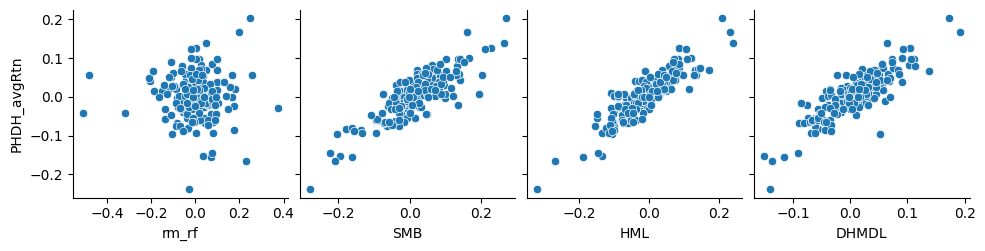

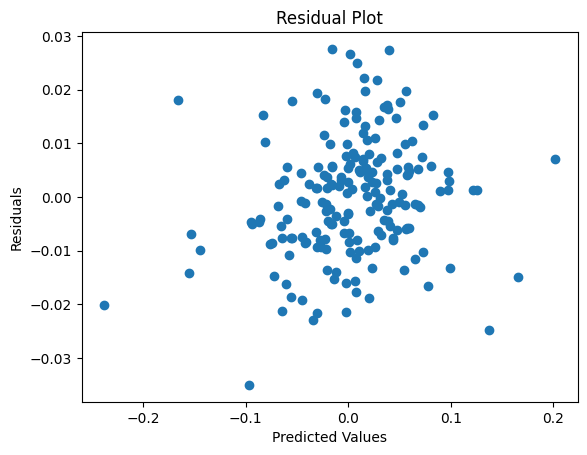

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

h = all_data[['rm_rf','SMB','HML','DHMDL','PHDH_avgRtn']]

X = h.iloc[:, :-1].values
y = h.iloc[:, -1].values

# 상수(intercept) 추가
X = sm.add_constant(X)

# 다중 선형 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 산점도 분석
sns.pairplot(h, x_vars=['rm_rf', 'SMB', 'HML', 'DHMDL'], y_vars='PHDH_avgRtn', kind='scatter')
plt.plot()
plt.show()

# 잔차 분석
residuals = model.resid
plt.scatter(y, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [67]:
import statsmodels.api as sm

feature_add = sm.add_constant(X, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1228.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          5.29e-133
Time:                        13:44:47   Log-Likelihood:                 594.51
No. Observations:                 192   AIC:                            -1179.
Df Residuals:                     187   BIC:                            -1163.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.770      0.442      -0.001       0.001
x1             0.0003      0.000      0.770      0.442      -0.001       0.001
x2            -0.0055      0.008     -0.686      0.494      -0.021       0.010
x3             0.2585      0.013     19.723      0.000       0.233       0.284
x4             0.2879      0.016     17.845      0.000       0.256       0.320
x5             0.3838      0.023     16.921      0.000       0.339       0.428
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.126
Skew:                           0.028   Prob(JB):                        0.939
Kurtosis:                       3.113   Cond. No.                     2.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""